## Get spatial location of electrodes and neurons on arrays

In [1]:
'''
Dependencies
'''
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import pandas as pd
import scipy.stats as stats
import scipy.sparse as sparse
import warnings 
from scipy import integrate
import seaborn as sns
warnings.simplefilter('ignore')
from sklearn.decomposition import PCA
import scipy.io as sio
from tqdm.auto import tqdm
import importlib

sns.set_style('white')
# to change default color cycle
cs = ['#0D7BBF', '#716568', '#EE922F', '#E6E4C1', '#BCC2C3', '#4D7399', '#CDBCA5']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cs)
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

from pyaldata import *
import rutils
from rutils import *

importlib.reload(rutils);

## Load session data

In [2]:
'''
Insert path and filename 
'''
path = '/Users/Daphne/Data/'  
fname = 'Chewie_CO_VR_2016-10-06.mat' 
df = mat2dataframe(path+fname, shift_idx_fields=True)

In [3]:
df.shape

(774, 24)

In [4]:
df.head()

monkey        date task  target_direction  trial_id result  bin_size  \
0  Chewie  10-06-2016   CO         -2.356194         1      R      0.01   
1  Chewie  10-06-2016   CO          1.570796         2      R      0.01   
2  Chewie  10-06-2016   CO          0.785398         3      R      0.01   
3  Chewie  10-06-2016   CO          3.141593         4      R      0.01   
4  Chewie  10-06-2016   CO         -1.570796         5      R      0.01   

  perturbation  perturbation_info epoch  ...  idx_peak_speed  idx_trial_end  \
0           VR              -0.52    BL  ...             363            436   
1           VR              -0.52    BL  ...             356            447   
2           VR              -0.52    BL  ...             414            483   
3           VR              -0.52    BL  ...             397            458   
4           VR              -0.52    BL  ...             301            362   

                                                 pos  \
0  [[-5.399950889827338, -25.11058978269873], [-5...   
1  [[-5.194667657852522, -35.190944353130526], [-...   
2  [[0.35267826312911055, -22.923278550949004], [...   
3  [[5.072834875801728, -24.89410841851521], [5.0...   
4  [[-8.194254800472459, -30.26359832666607], [-8...   

                                                 vel  \
0  [[4.615264447089089, -3.6781866137904946], [4....   
1  [[2.3921738136280783, 2.833707639241631], [2.7...   
2  [[0.5017102009485903, -3.146994710197926], [0....   
3  [[-1.3275097541588876, -3.5308863978243985], [...   
4  [[1.8501123719868446, 0.8394848146862552], [2....   

                                                 acc  \
0  [[34.913180411358354, -17.92603186704403], [13...   
1  [[31.99226756476989, 80.42711312188004], [34.1...   
2  [[-7.180978950112355, -35.21789901845524], [3....   
3  [[-6.932033881542791, 0.17982626642873387], [-...   
4  [[48.123169514922175, -9.081942493745938], [58...   

                                               force  \
0  [[0.3854857746577438, -0.18448026169727955], [...   
1  [[0.1778157378731141, 0.12542049016429982], [0...   
2  [[0.2833417683274762, -0.1285513884878812], [0...   
3  [[0.08675043530985374, 0.03658922221440793], [...   
4  [[0.2054977133197953, -0.12485484173352068], [...   

                                           M1_spikes  \
0  [[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,...   
1  [[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,...   
2  [[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,...   
3  [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4  [[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,...   

                                       M1_unit_guide  \
0  [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...   
1  [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...   
2  [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...   
3  [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...   
4  [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...   

                                          PMd_spikes  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2  [[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4  [[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                      PMd_unit_guide  
0  [[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2...  
1  [[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2...  
2  [[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2...  
3  [[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2...  
4  [[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2...  

[5 rows x 24 columns]

In [5]:
df.M1_unit_guide[0]

array([[ 5,  1],
       [ 5,  2],
       [ 5,  3],
       [ 5,  4],
       [ 9,  1],
       [ 9,  2],
       [ 9,  3],
       [10,  1],
       [13,  1],
       [13,  2],
       [13,  3],
       [13,  4],
       [15,  1],
       [16,  1],
       [18,  1],
       [20,  1],
       [20,  2],
       [24,  1],
       [24,  2],
       [24,  3],
       [26,  1],
       [28,  1],
       [28,  2],
       [28,  3],
       [32,  1],
       [32,  2],
       [32,  3],
       [34,  1],
       [36,  1],
       [40,  1],
       [40,  2],
       [42,  1],
       [43,  1],
       [44,  1],
       [46,  1],
       [46,  2],
       [46,  3],
       [46,  4],
       [47,  1],
       [50,  1],
       [50,  2],
       [51,  1],
       [52,  1],
       [53,  1],
       [53,  2],
       [54,  1],
       [54,  2],
       [54,  3],
       [54,  4],
       [56,  1],
       [62,  1],
       [62,  2],
       [65,  1],
       [75,  1],
       [79,  1],
       [86,  1],
       [91,  1],
       [91,  2],
       [92,  1

## Read cmp file

The `.cmp` file contains the location of the electrodes on the array.

We want to know the spatial location of electrodes so that we know the spatial location of the recorded neurons.

Note that, while an array is a 10x10 grid, there are only 96 electrodes on a given array due to hardware constraints. 

By default, omitted electrodes (dead electrodes) are the 4 corner grids. If something goes wrong during fabrication however, this may change.

In [6]:
df_m1_arr = read_cmp('/Users/Daphne/Desktop/Chewie Left M1 SN 6250-001474.cmp')
df_pmd_arr = read_cmp('/Users/Daphne/Desktop/Chewie Left PMd SN 6251-001469.cmp')

In [7]:
df_m1_arr.head()

array_col  array_row channel_num  within_channel_num  global_enum
0          0          8           C                   1           96
1          0          7           C                   3           95
2          0          6           C                   5           94
3          0          5           C                   7           93
4          0          4           C                   9           92

## Get spatial location of electrodes on arrays

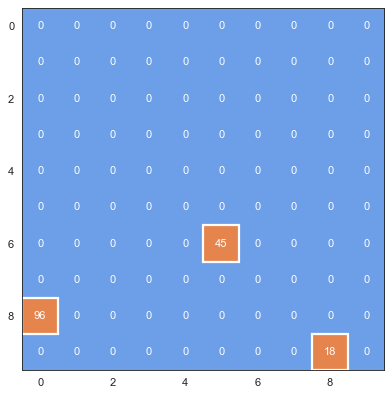

In [8]:
localize_elecs(df_m1_arr, elecs=[96, 18, 45], verbose=True);

For the M1 array, we see that indeed all corner squares are omitted.

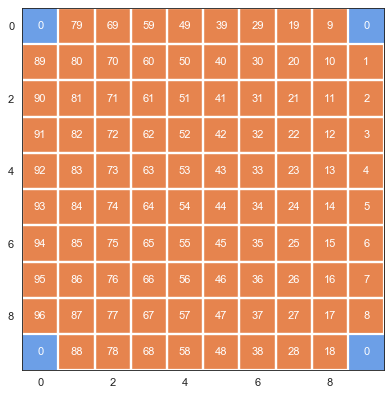

In [9]:
localize_elecs(df_m1_arr, elecs=range(1,97), verbose=True);

For the PMd array one dead electrode has a different location.

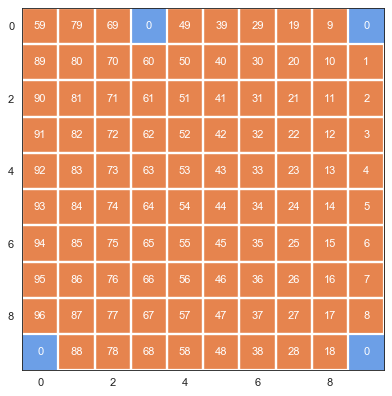

In [10]:
localize_elecs(df_pmd_arr, elecs=range(1,97), verbose=True);

The colored grids are just for visualisation purposes, we can use the np arrays to continue.

We have the spatial location of each electrode and we have **unit guides** that specify how many neurons each electrode covers.

Connecting these two, we can get the spatial location of $n$ neurons on the array.

In [11]:
m1_elecmap  = localize_elecs(df_m1_arr, elecs=range(1,97))
pmd_elecmap = localize_elecs(df_pmd_arr, elecs=range(1,97))

In [12]:
pmd_elecmap

array([[59., 79., 69.,  0., 49., 39., 29., 19.,  9.,  0.],
       [89., 80., 70., 60., 50., 40., 30., 20., 10.,  1.],
       [90., 81., 71., 61., 51., 41., 31., 21., 11.,  2.],
       [91., 82., 72., 62., 52., 42., 32., 22., 12.,  3.],
       [92., 83., 73., 63., 53., 43., 33., 23., 13.,  4.],
       [93., 84., 74., 64., 54., 44., 34., 24., 14.,  5.],
       [94., 85., 75., 65., 55., 45., 35., 25., 15.,  6.],
       [95., 86., 76., 66., 56., 46., 36., 26., 16.,  7.],
       [96., 87., 77., 67., 57., 47., 37., 27., 17.,  8.],
       [ 0., 88., 78., 68., 58., 48., 38., 28., 18.,  0.]])

## Unit guides

The unit guides specify the number of neurons per electrode. 

```
[electrode k, neuron 1]
[electrode k, neuron 2]
[electrode k, neuron 3]
[electrode k+1, neuron 1]
etc.
```

While the unit guides are `(774 x N)` (we have a unit guide for each row), they are all equal.

So we can pick an arbitrary row. 

In [13]:
m1_cell_distrib, m1_cells_on_arr = elecs_to_neurons(m1_elecmap, df['M1_unit_guide'][0])

pmd_cell_distrib, pmd_cells_on_arr = elecs_to_neurons(pmd_elecmap, df['PMd_unit_guide'][0])

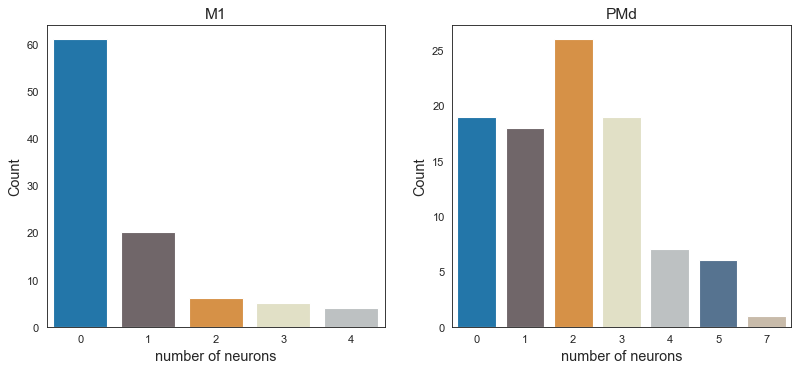

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), dpi=80)

sns.countplot(x=m1_cell_distrib, ax=ax1)
ax1.set_title('M1', fontsize=14)
ax1.set_xlabel('number of neurons', fontsize=13)
ax1.set_ylabel('Count', fontsize=13)

sns.countplot(x=pmd_cell_distrib, ax=ax2)
ax2.set_title('PMd', fontsize=14)
ax2.set_xlabel('number of neurons', fontsize=13)
ax2.set_ylabel('Count', fontsize=13);

This shows the number of neurons each electrode covers on the M1 array... why are there so many electrodes without neurons?

Total number of neurons on the M1 array is 63


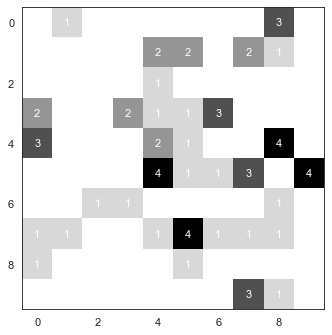

In [15]:
print(f'Total number of neurons on the M1 array is {sum(m1_cell_distrib)}')

display_grid(m1_cells_on_arr)

Total number of neurons on the PMd array is 192


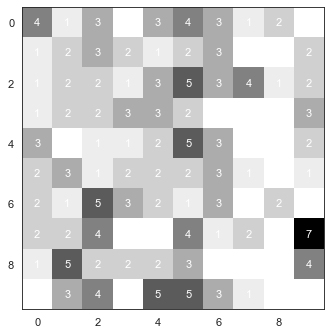

In [16]:
print(f'Total number of neurons on the PMd array is {sum(pmd_cell_distrib)}')

display_grid(pmd_cells_on_arr)

In [20]:
#np.where(unit_guide[:, 0] == 5)

In [19]:
#np.unique(unit_guide[:, 0])

In [22]:
#df['M1_spikes'][0][:, 0] # one trial, one spike train

In [23]:
#df['M1_spikes'][0].shape

In [27]:
unit_guide = df['M1_unit_guide'][0]

df_flat = pd.DataFrame(columns=['electrode', 'neuron', 'trial', 'spikes'])

for i, row in enumerate(unit_guide):
    e, n = row
    df_app = pd.DataFrame(columns=['trial', 'spikes'])
    for tr in range(df.shape[0]):
        df_app = df_app.append({
            'trial' : tr,
            'spikes' : df['M1_spikes'][tr][:, i]
        }, ignore_index=True)
    df_app['electrode'] = e
    df_app['neuron'] = n
    df_flat = df_flat.append(df_app, ignore_index=True)
    
df_flat = df_flat.loc[:, ['electrode', 'neuron', 'trial', 'spikes']]

In [29]:
df_flat

electrode neuron trial  \
0             5      1     0   
1             5      1     1   
2             5      1     2   
3             5      1     3   
4             5      1     4   
...         ...    ...   ...   
48757        96      1   769   
48758        96      1   770   
48759        96      1   771   
48760        96      1   772   
48761        96      1   773   

                                                  spikes  
0      [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...  
1      [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...  
2      [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...  
3      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...  
4      [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...  
...                                                  ...  
48757  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
48758  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...  
48759  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
48760  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  
48761  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[48762 rows x 4 columns]

## Do PCA on each for each electrode separately 

Get the spike trains for each individual electrode.

Do PCA on these (transformed) spike trains.

Make a histogram to compare the differences.

## Spike trains

In `[brain_area]_spikes` the rows indicate the timepoints and the columns the neurons `[timepoints, neurons] = [447, 63]`.

We make a dictionary that serves as a mapping between the neurons on the electrodes and 


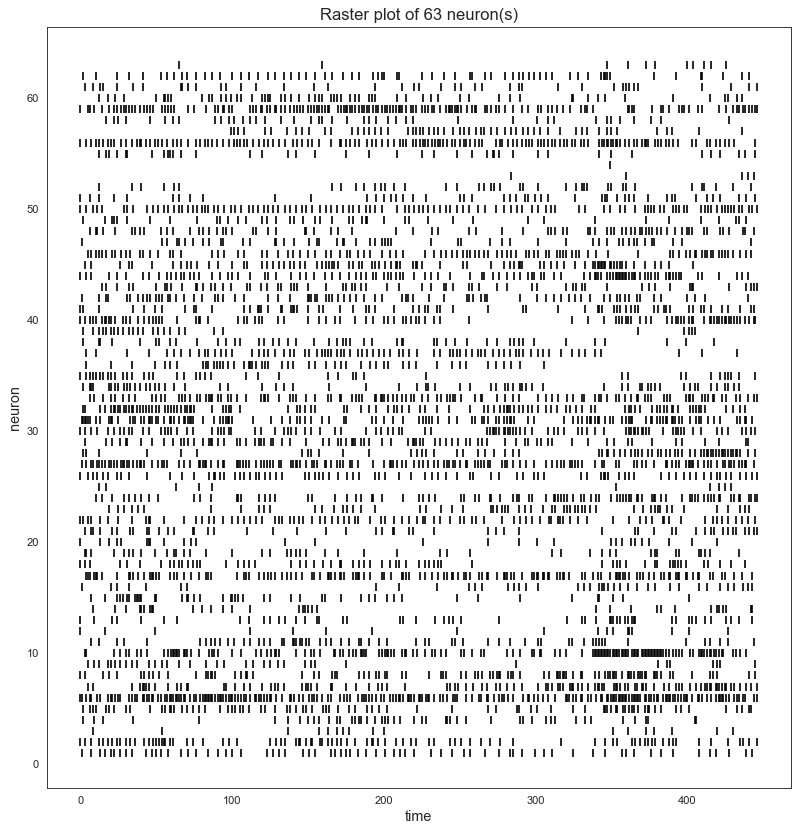

In [72]:
make_raster(df['M1_spikes'][0])

In [105]:
def get_neuron_elec_mapping(elec_map, unit_guide, spikes, trial):
    '''
    
    Parameters
    ----------
    elec_map:
    
    unit_guide: 
    
    Returns
    -------
    unit_arr: 

    '''
    elecs = list(range(1, 97)) # total number of electrodes
    unit_arr = np.zeros((10, 10)) # assuming 10x10 array
    neuron_distrib = []
    elecs_to_spikes = {}
    
    # get the spike trains from a particular trial
    spikes_trial_i = spikes[trial]

    for e in elecs:

        # find indices in unit guide of this electrode number 
        e_indices = np.where(unit_guide[:, 0] == e)

        if np.size(e_indices) == 0: # skip if electrode number is not in col
            neuron_distrib.append(0)
            elecs_to_spikes.update({e: np.array([])}) # add empty array?
            continue

        # take neurons that belong to these indices 
        neurons_at_e = max(unit_guide[:, 1][e_indices])

        neuron_distrib.append(neurons_at_e) # largest number is total number of neurons

        arr_idx = np.where(elec_map == e) # get spatial location of electrode
        unit_arr[arr_idx] = neurons_at_e # store number of neurons in array

        # spiketrains of neurons that belong to electrode e
        spikes_elec_k = np.array([spikes_trial_i[:, k] for k in e_indices])[0]

        # append to dictionary with electrode num as key and spiketrains as values
        elecs_to_spikes.update({e:spikes_elec_k})
        
    return neuron_distrib, unit_arr, elecs_to_spikes

In [ ]:
# unit_guide = df['M1_unit_guide'][0]
# elecs = list(range(1, 97)) # total number of electrodes
# unit_arr = np.zeros((10, 10)) # assuming 10x10 array
# elecs_to_spikes = {}

# # get the spike trains from a particular trial
# spikes_trial_i = spikes[trial]


#     # find indices in unit guide of this electrode number 
#     e_indices = np.where(unit_guide[:, 0] == e)

#     if np.size(e_indices) == 0: # skip if electrode number is not in col
#         neuron_distrib.append(0)
#         elecs_to_spikes.update({e: np.array([])}) # add empty array?
#         continue

#     # take neurons that belong to these indices 
#     neurons_at_e = max(unit_guide[:, 1][e_indices])

#     neuron_distrib.append(neurons_at_e) # largest number is total number of neurons

#     arr_idx = np.where(elec_map == e) # get spatial location of electrode
#     unit_arr[arr_idx] = neurons_at_e # store number of neurons in array

#     # spiketrains of neurons that belong to electrode e
#     spikes_elec_k = np.array([spikes_trial_i[:, k] for k in e_indices])[0]

#     # append to dictionary with electrode num as key and spiketrains as values
#     elecs_to_spikes.update({e:spikes_elec_k})
